# Velocity of M2 Money Stock vs Theoretical Velocities Implied by Quantity Theory of Money (QMT)
- Comparing the Velocity of Money Implied by QMT with FRED's [Velocity of M2 Money Stock](https://fred.stlouisfed.org/series/M2V)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def normalize(df):
    '''Normalize a dataframe to a 0-1 range'''
    return (df - df.min()) / (df.max() - df.min())
# get CPI df from CPIAUCNS.csv
CPI = pd.read_csv('data/CPIAUCNS.csv', index_col='DATE', parse_dates=True)

# get GDP df from GDPC1.csv
GDP = pd.read_csv('data/GDP.csv', index_col='DATE', parse_dates=True)

# get Money Supply df from M2SL.csv
M2 = pd.read_csv('data/M2SL.csv', index_col='DATE', parse_dates=True)



In [28]:
df = pd.DataFrame(index=CPI.index)

# add CPI, GDP, M2 columns to velocity df
df['CPI'] = CPI['CPIAUCNS'] / 100 # units of Consumer Price Index are in percent
df['GDP'] = GDP['GDP'] * 1000000000 # units are in billion USD
df['M2'] = M2['M2SL'] * 1000000000 # units are in billion USD
df['velocity'] = df['CPI'] * df['GDP'] / df['M2'] # velocity of money = CPI * GDP / M2
df['inflation'] = df['CPI'].pct_change() # inflation = percent change in CPI


In [29]:
df.tail(10)

,CPI,GDP,M2,velocity,inflation
DATE,,,,,
2022-03-01,2.87504,NaN,2.173970e+13,NaN,0.013351
2022-04-01,2.89109,2.524848e+13,2.164420e+13,3.372526,0.005583
2022-05-01,2.92296,NaN,2.164900e+13,NaN,0.011024
2022-06-01,2.96311,NaN,2.160730e+13,NaN,0.013736
2022-07-01,2.96276,2.572394e+13,2.163610e+13,3.522532,-0.000118
2022-08-01,2.96171,NaN,2.163190e+13,NaN,-0.000354
2022-09-01,2.96808,NaN,2.150330e+13,NaN,0.002151
2022-10-01,2.98012,2.613246e+13,2.141550e+13,3.636518,0.004056
2022-11-01,2.97711,NaN,2.135480e+13,NaN,-0.001010


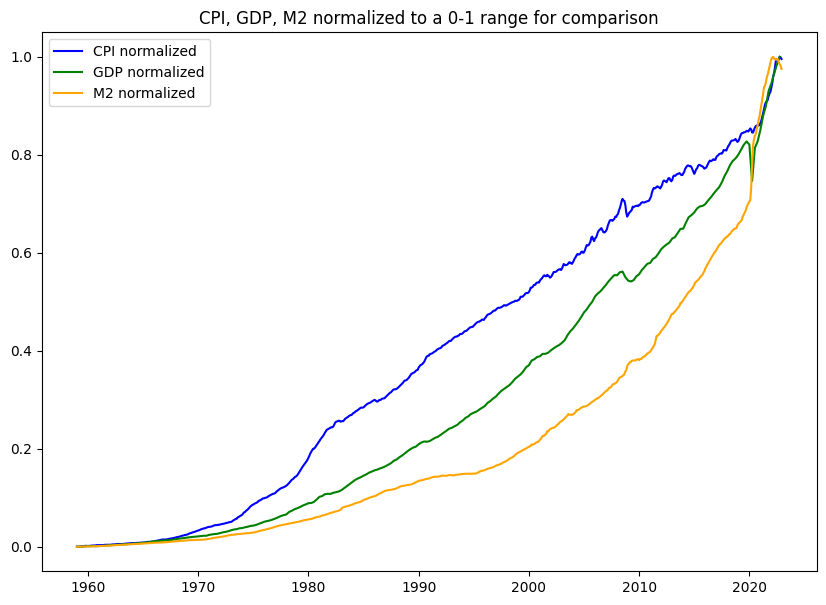

In [30]:
plt.figure(figsize=(10,7))
plt.plot(normalize(df["CPI"].dropna()), label="CPI normalized",color="blue")
plt.plot(normalize(df["GDP"].dropna()), label="GDP normalized",color="green")
plt.plot(normalize(df["M2"].dropna()), label="M2 normalized",color="orange")
# plt.plot(normalize(df["inflation"].dropna()), label="inflation normalized",color="purple")
plt.title("CPI, GDP, M2 normalized to a 0-1 range for comparison")
plt.legend()
plt.show()



# Normalized To Display Features

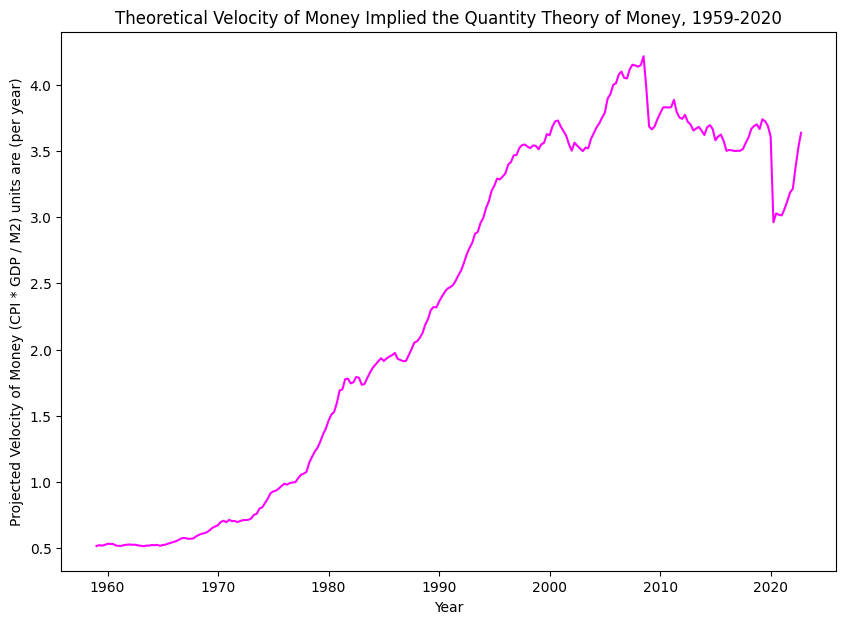

In [31]:
plt.figure(figsize=(10,7))
plt.plot(df["velocity"].dropna(), label="velocity",color="magenta")
plt.xlabel('Year')
plt.ylabel('Projected Velocity of Money (CPI * GDP / M2) units are (per year)')
plt.title('Theoretical Velocity of Money Implied the Quantity Theory of Money, 1959-2020')
plt.show()



    

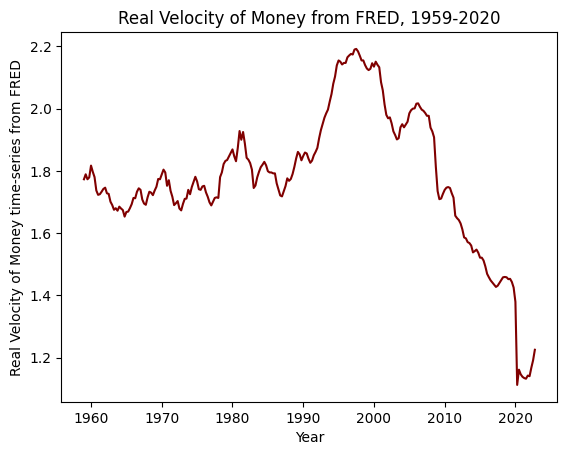

In [32]:
# download real velocity of money data from M2V.csv
M2V = pd.read_csv('data/M2V.csv', index_col='DATE', parse_dates=True)

plt.plot(M2V["M2V"].dropna(), label="velocity",color="maroon")
plt.xlabel('Year')
plt.ylabel('Real Velocity of Money time-series from FRED')
plt.title('Real Velocity of Money from FRED, 1959-2020')
plt.show()


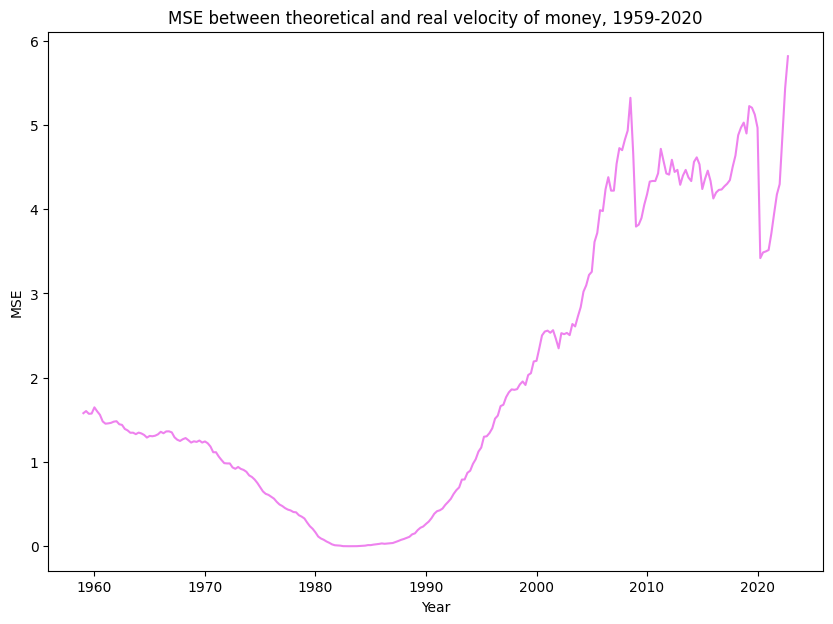

In [33]:
df["MSE"] = (df["velocity"] - M2V["M2V"])**2 # MSE = (theoretical velocity - real velocity)^2

plt.figure(figsize=(10,7))
plt.plot(df["MSE"].dropna(), label="MSE",color="violet") 
plt.xlabel('Year')
plt.ylabel('MSE')
plt.title('MSE between theoretical and real velocity of money, 1959-2020')
plt.show()

# The MSE is very high, so the theoretical velocity of money is not a good fit for the real velocity of money


# Comments on MSE timeseries
    - During a breif period of time between 1980-1990, the error in the Quantity Theory of Money derived estimate was especially low. 
    - The MSE is diverging and has almost steadily been increasing since 1990.
    - The QTM model appears to be breaking down in this limited sample space with the data in question.


Text(0.5, 1.0, 'Theoretical Inflation Rate from percent change in CPI, 1959-2020')

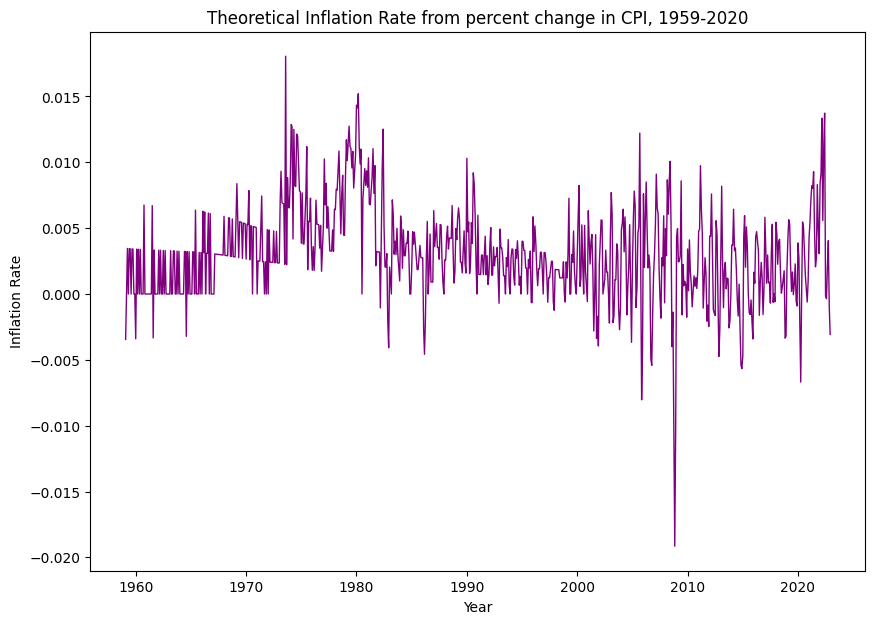

In [34]:
# Inflation Rate from percent change in CPI
plt.figure(figsize=(10,7))
plt.plot(df["inflation"].dropna(), label="inflation",color="purple", linewidth=1, markersize=1)
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Theoretical Inflation Rate from percent change in CPI, 1959-2020')


Text(0.5, 0, 'Inflation Rate')

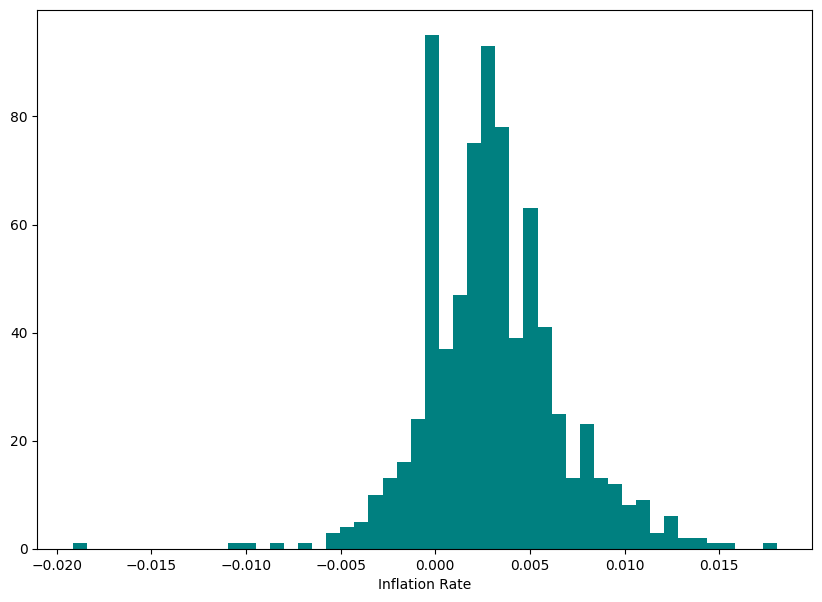

In [35]:
# inflation rate histogram
plt.figure(figsize=(10,7))
plt.hist(df["inflation"].dropna(), bins=50, color="teal")
plt.xlabel('Inflation Rate')